## Dataset: Banknotes Authentication
## Agenda:
### Use a Decision Tree Classifier to decide whether the Banknote is Authenicate or fake.
### use Bagging to improve the Accuracy.

In [1]:
# Import all Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # accuracy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

In [2]:
# Import the Data.
data=pd.read_csv("C:/Users/Lenovo/Desktop/Semester- III/ML Data Set/banknotes_authentication.csv")
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
# Check the Head of the Data
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# Check the Tail of the data
data.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [5]:
data.shape # Shape of the Data

(1372, 5)

In [6]:
data.size # Size of the Data

6860

In [7]:
data.isnull().sum() # Count the nulls

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [8]:
data.describe # It describe the data

<bound method NDFrame.describe of       Variance  Skewness  Curtosis  Entropy  Class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

<AxesSubplot:>

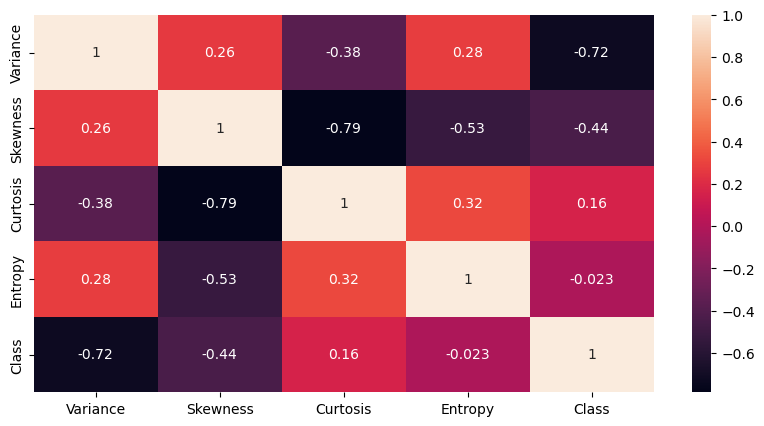

In [9]:
# Make a Heatmap to find the correlation
import seaborn as sns
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(data.corr(),annot=True)

In [10]:
x=data.iloc[:,[2,3]].values # Independent
y=data.iloc[:,-1].values    # Dependent

In [11]:
# Here we are Splitting the Data xtrain and ytrain
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state=0)

In [12]:
print(xtest) # Chech the xtest

[[ 1.02184e+01 -1.00430e+00]
 [ 3.26160e-01  1.11510e+00]
 [-1.93850e+00 -3.89180e+00]
 [ 3.30800e+00  4.89210e-01]
 [-1.37210e+00  1.16680e+00]
 [ 8.52700e+00 -1.86680e+00]
 [ 3.09460e+00 -4.89780e+00]
 [-2.34250e-02  1.23140e+00]
 [ 1.67166e+01 -3.21680e+00]
 [ 3.36020e+00  1.71000e-03]
 [ 1.07420e+00 -3.34090e+00]
 [-2.59050e+00 -3.65530e-01]
 [-2.36520e+00 -1.27460e+00]
 [-2.54250e+00 -1.28230e+00]
 [-4.27590e+00 -4.97800e+00]
 [-3.27940e+00 -1.20090e+00]
 [-3.54210e-02 -2.50950e+00]
 [-3.35220e+00 -6.65530e-01]
 [ 1.42810e+00  2.02020e+00]
 [-2.43200e+00 -9.83630e-01]
 [ 1.25550e+01 -1.50990e+00]
 [ 2.77420e+00 -2.02600e-01]
 [-2.95120e+00 -1.47240e+00]
 [-2.17930e-01  1.04260e+00]
 [-1.33100e+00 -5.47070e+00]
 [-2.21690e+00 -5.67250e-01]
 [-3.82090e+00 -3.71330e+00]
 [-5.89800e-01 -3.96420e+00]
 [ 3.82380e+00 -8.16820e-01]
 [-2.16720e+00 -7.41820e-01]
 [ 1.13880e+01 -1.07410e+00]
 [ 4.64290e+00 -2.95700e-01]
 [ 4.25910e+00  2.79720e-01]
 [ 4.65750e+00  1.69810e-01]
 [ 5.91790e+00

In [13]:
print(ytest) # Check the y test

[1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0
 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1
 1 1 0 1 0 0 0 0 0 1 0 1 1 0]


In [14]:
# Applying the Decision Tree Clasifier
clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=2)
# Performing training
clf_entropy.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [15]:
# We predict the xtest 
ypred=clf_entropy.predict(xtest)
print("Predicted Values")
print(ypred)

Predicted Values
[1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1
 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0
 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0
 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [16]:
# Make the confusion metrics and make classification report
print("Confusion Metrics:\n",confusion_matrix(ytest,ypred))
print("Report:\n",classification_report(ytest,ypred))

Confusion Metrics:
 [[139 116]
 [ 82 121]]
Report:
               precision    recall  f1-score   support

           0       0.63      0.55      0.58       255
           1       0.51      0.60      0.55       203

    accuracy                           0.57       458
   macro avg       0.57      0.57      0.57       458
weighted avg       0.58      0.57      0.57       458



In [17]:
# Check the Accuracy Score
import sklearn.metrics as metrics
print("Accuracy",metrics.accuracy_score(ytest,ypred)*100)

Accuracy 56.76855895196506


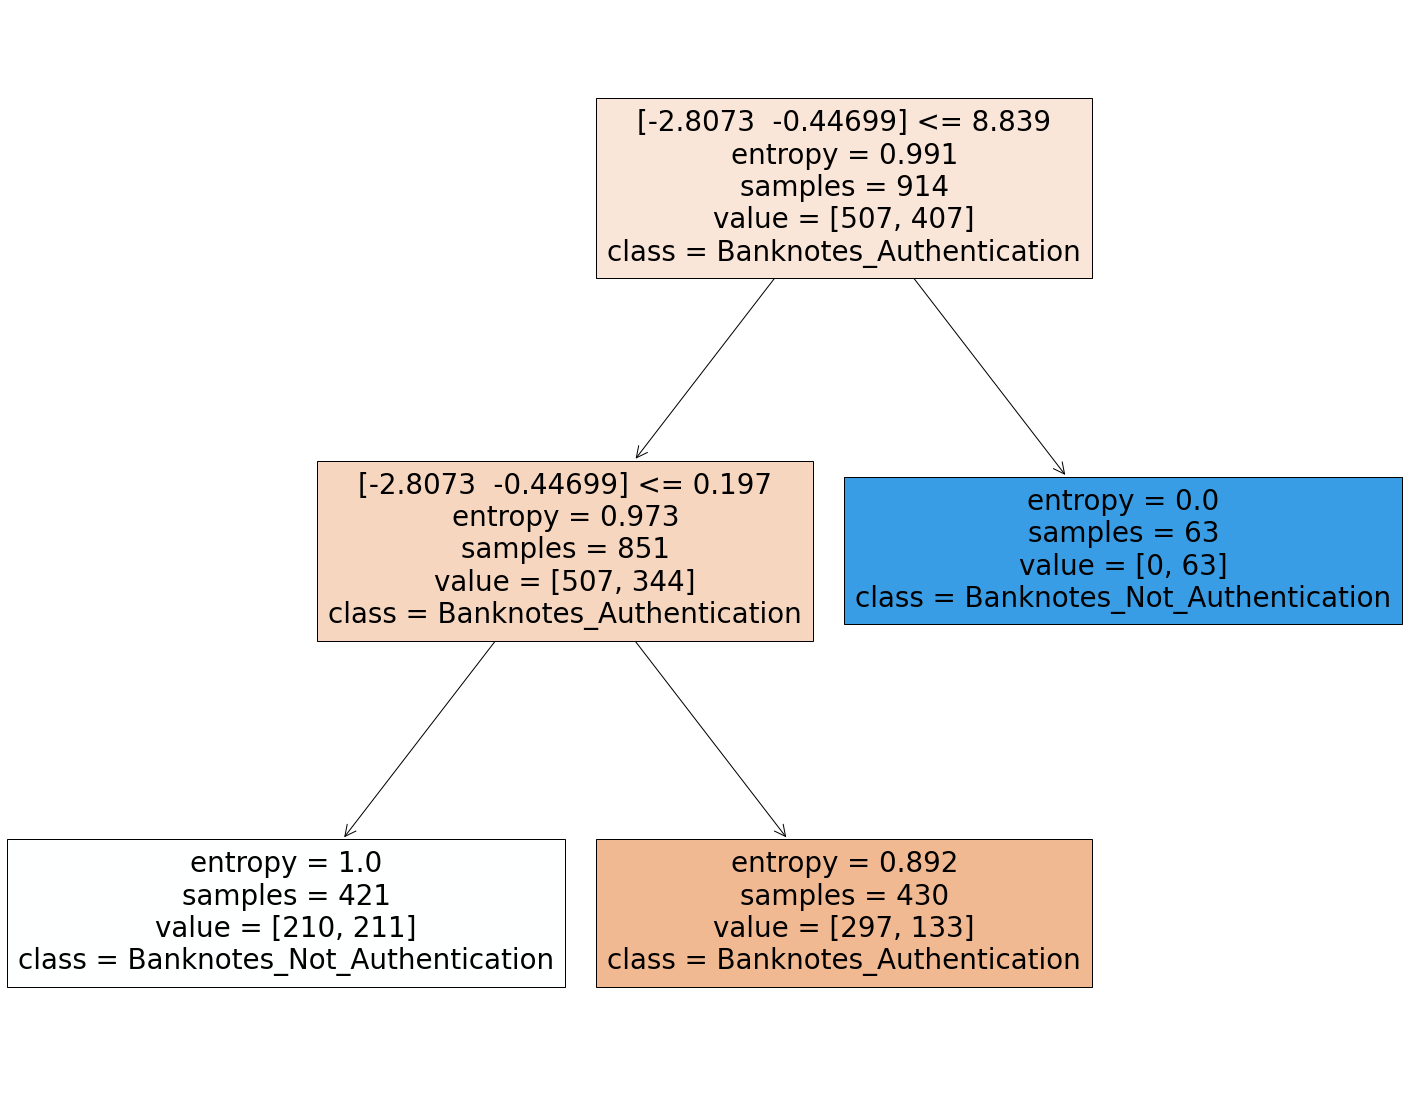

In [18]:
# Make the Decision Tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,20))
a=tree.plot_tree(clf_entropy,feature_names=x,class_names=["Banknotes_Authentication","Banknotes_Not_Authentication"],filled=True)

In [19]:
# Prediction on random data using clf_entropy
# We put random 2 feature values and make prediction
xrandom=[[6.8,1.8]]
ypred1=clf_entropy.predict(xrandom)
print(ypred1)

[0]


In [20]:
# Implementation of the Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=1)
# Fittingthe mode
tree=tree.fit(xtrain,ytrain)
bag=BaggingClassifier(base_estimator=tree,n_estimators=500,random_state=0)
bag=bag.fit(xtrain,ytrain)
# Prediciting
y_train_pred=bag.predict(xtrain)
y_test_pred=bag.predict(xtest)
bag_test=round(accuracy_score(ytest,y_test_pred),2)*100
print(bag_test,"%")

73.0 %
